In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.shape


(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
x = data.iloc[:, [3,4]].values


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss = []
for i in range (1,11):
 kmeans = KMeans(n_clusters =i , init ="k-means++", random_state=0)
 kmeans.fit(x)
 wcss.append(kmeans.inertia_)

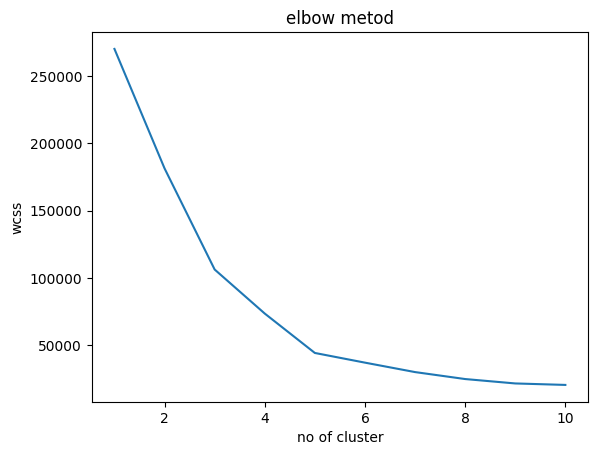

In [ ]:

plt.plot(range(1,11), wcss)
plt.title("elbow metod")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [ ]:
correlation = data.corr ()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

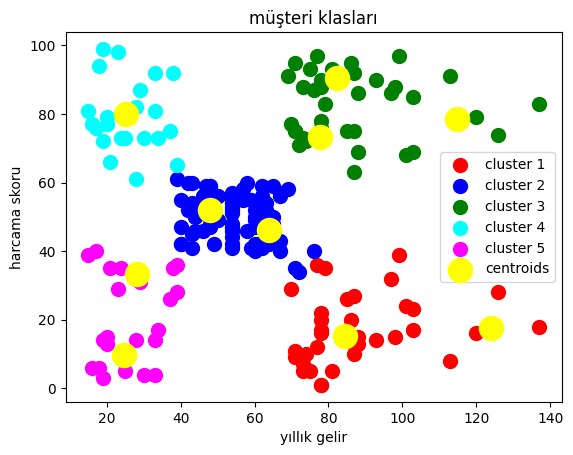

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 100, c ="red", label= "cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 100, c ="blue", label= "cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 100, c ="green", label= "cluster 3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s= 100, c ="cyan", label= "cluster 4")
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s= 100, c ="magenta", label= "cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="centroids")
plt.title("müşteri klasları")
plt.xlabel("yıllık gelir")
plt.ylabel("harcama skoru")
plt.legend()
plt.show()

In [ ]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

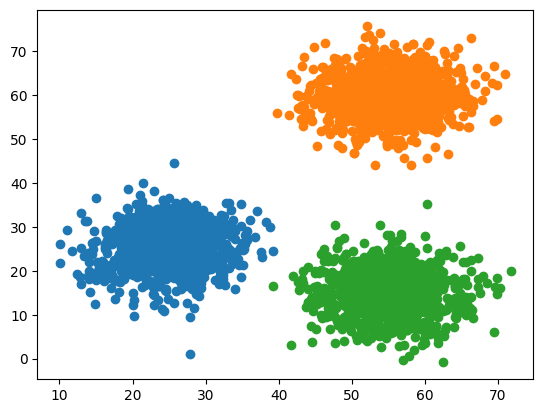

In [ ]:
dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

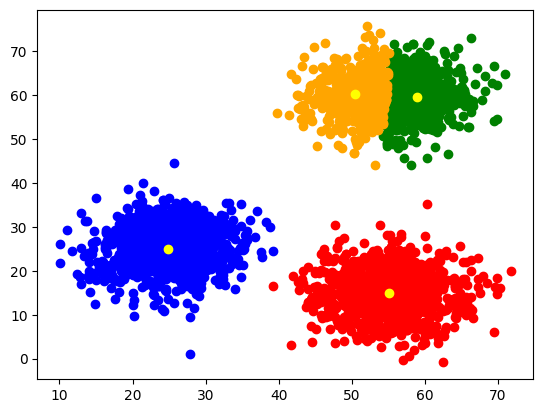

In [ ]:
kmeans2 = KMeans(n_clusters=4)
clusters = kmeans2.fit_predict(data)
data["label"] = clusters
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(data.x[data.label == 3 ],data.y[data.label == 3],color = "orange")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

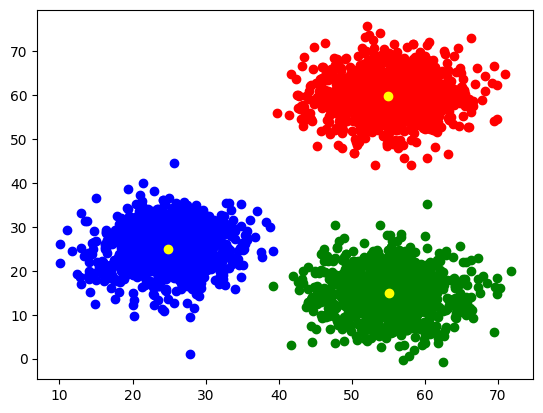

In [ ]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)
data["label"] = clusters
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

